# **Introduction**

![spotify banner](./static/images/spotify_banner.png)

In the era of music streaming platforms, such as Spotify, the vast amount of available songs can be overwhelming for users looking to discover new music that aligns with their preferences. In order to enhance the user experience and facilitate music exploration, the development of recommendation systems has become crucial. These systems aim to provide personalized song suggestions tailored to each individual's unique tastes and preferences.

By leveraging advanced machine learning algorithms, these recommendation systems can analyze user behavior, preferences, and historical data to generate accurate and relevant song recommendations.

# **Problem Definition**

Our **objective** is to develop a **simple recommendation system** for songs that takes a song as input and generates a list of **similar songs** from a pre-existing database.

The system does not rely on user preferences or historical data but rather focuses on finding songs that share similar characteristics and attributes using **cosine similarity**. By leveraging song features such as genre, tempo, mood, and musical elements, the recommendation system aims to provide users with a selection of songs that are stylistically or thematically related to the input song.




# **Libraries**

In [37]:
%pip install -r ./requirements.txt

  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import numpy as np
import opendatasets as od
from config import *
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
from providers.scraper import *
from sklearn.metrics.pairwise import cosine_similarity

# **Data Acquisition**

In [4]:
link = 'https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify'

This step requires kaggle.json to be in the same working directory.

You can also just download the dataset from https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify and put it in the "./app/data" directory.

In [ ]:
# od.download(link, data_dir=DATA_DIR)

In [83]:
dfPath = os.path.join(DATA_DIR, 'genres_v2.csv')

songsDf = pd.read_csv(dfPath)

/tmp/ipykernel_86902/313602397.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  songsDf = pd.read_csv(dfPath)


# **Pre-Profiling**

In [12]:
songsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [10]:
songsDf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [11]:
songsDf.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

# **Pre Processing**

In [84]:
colsToDrop = ['song_name', 'Unnamed: 0', 'title', 'type', 'id', 'uri', 'track_href', 'analysis_url']
songsDfTemp = songsDf.drop(colsToDrop, axis=1)

In [85]:
songsDfTemp['type'].value_counts()

KeyError: 'type'

In [86]:
songsDfTemp.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


In [87]:
songsDfTemp['genre'].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

<Axes: ylabel='count'>

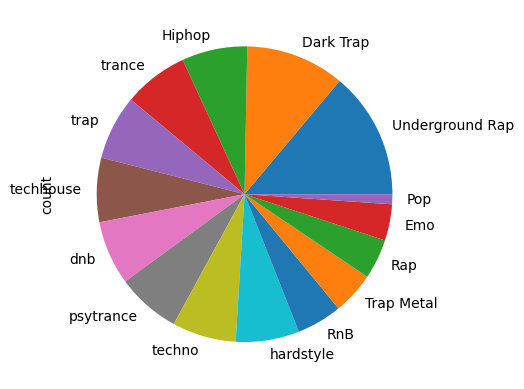

In [88]:
songsDfTemp['genre'].value_counts().plot.pie()

# **Categorical Continuous Split**

In [89]:
cat_cols = songsDfTemp.select_dtypes(include=['object'])
cont_cols = songsDfTemp.select_dtypes(include=['number'])

In [30]:
cat_cols.head()

,genre
0,Dark Trap
1,Dark Trap
2,Dark Trap
3,Dark Trap
4,Dark Trap


In [31]:
cont_cols.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


# **Encoding**

In [35]:
cat_cols = pd.get_dummies(cat_cols, dtype=float)

# **Scaling**

In [39]:
scaler = StandardScaler()
cont_cols = scaler.fit_transform(cont_cols)

In [47]:
DATA_DIR

'./data'

In [9]:
scalerDir = os.path.join(DATA_DIR, "scalers")
scalerPath = os.path.join(scalerDir, "continuous_scaler.pkl")

In [60]:
with open(scalerPath, 'wb') as f:
    pickle.dump(scaler, f  , protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
with open(scalerPath, 'rb') as f:
    scaler = pickle.load(f)

# **Concatenation**

In [64]:
cont_cols

array([[ 1.22360786,  0.2800791 , -0.91929801, ...,  0.39887636,
        -1.22699247,  0.10218413],
       [ 0.50847965, -1.46618532,  0.71731784, ..., -1.35856366,
        -0.25679629,  0.10218413],
       [ 1.34492425,  0.70984511, -0.10099009, ...,  2.95986132,
        -1.4767873 ,  0.10218413],
       ...,
       [-1.77737659,  0.31815963,  0.71731784, ...,  0.31290208,
        -0.15582161,  0.10218413],
       [-1.03670809,  0.86216724,  0.17177922, ...,  0.10769616,
         0.70257007,  0.10218413],
       [-0.70468428,  0.99272907,  0.99008715, ...,  0.31759921,
        -0.861576  ,  0.10218413]])

In [67]:
cat_cols.columns

Index(['genre_Dark Trap', 'genre_Emo', 'genre_Hiphop', 'genre_Pop',
       'genre_Rap', 'genre_RnB', 'genre_Trap Metal', 'genre_Underground Rap',
       'genre_dnb', 'genre_hardstyle', 'genre_psytrance', 'genre_techhouse',
       'genre_techno', 'genre_trance', 'genre_trap'],
      dtype='object')

In [73]:
processedSongs = np.hstack((cat_cols.values, cont_cols))

In [74]:
processedSongsPath = os.path.join(DATA_DIR, "processedSongs.pkl")

In [76]:
with open(processedSongsPath, 'wb') as f:
    pickle.dump(processedSongs, f , protocol=pickle.HIGHEST_PROTOCOL)

In [62]:
allTracks = scaler.transform(cont_cols)

In [100]:
processedTracksPath = os.path.join(DATA_DIR, "allTracks.pkl")
with open(processedTracksPath, 'wb') as f:
    pickle.dump(allTracks, f , protocol=pickle.HIGHEST_PROTOCOL)

# **Model**

In [95]:
scraper = Scraper()
link = 'https://open.spotify.com/track/3M0lSi5WW79CXQamgSBIjx?si=7869a5c6dd3c4a8d'

In [96]:
featuresToDrop = ['type', 'id', 'uri', 'track_href', 'analysis_url']

def get_similar_songs(link, n_of_songs=5):
    trackFeatures = scraper.get_track_features(link)
    trackUri = trackFeatures['uri']
    for feature in featuresToDrop:
        del trackFeatures[feature]
    trackFeatures = np.array(list(trackFeatures.values())).reshape(1, -1)
    trackFeatures = scaler.transform(trackFeatures)
    similarityScores = cosine_similarity(trackFeatures, allTracks)
    sorted_indices = np.argsort(-similarityScores)
    similarIndices = sorted_indices[0][:n_of_songs]
    songsUris = songsDf.iloc[similarIndices].uri.values
    return trackUri, songsUris

In [97]:
trackUri, similarSongsUris = get_similar_songs(link)

/home/sid6i7/Desktop/.ok/Projects/spotify-song-recommendation/venv-spotify/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
